In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# Load the CSV file into a DataFrame
world_happiness = pd.read_csv('world_happiness.csv', index_col=0)

# Display the first few rows of the DataFrame
world_happiness.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [3]:
world_happiness.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [4]:
mean_happiness = world_happiness['happiness_score'].mean()
median_happiness = world_happiness['happiness_score'].median()
standard_deviation_happiness = world_happiness['happiness_score'].std()

In [5]:
print(f"Mean happiness score: {mean_happiness} \nMedian happiness score: {median_happiness} \nStandard deviation of happiness score: {standard_deviation_happiness}")

Mean happiness score: 77.64335664335664 
Median happiness score: 79.0 
Standard deviation of happiness score: 46.37741764616525


In [6]:
top_5_by_gdp_per_capita = world_happiness.sort_values(by='gdp_per_cap', ascending=False).head(5)
top_5_by_gdp_per_capita[['country', 'happiness_score']]


,country,happiness_score
28,Qatar,127
14,Luxembourg,142
33,Singapore,122
16,Ireland,140
3,Norway,153


<BarContainer object of 5 artists>

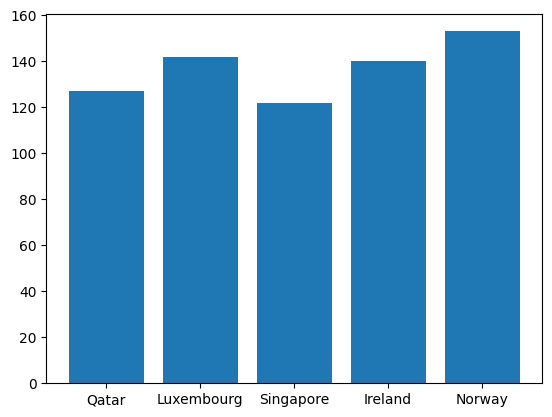

In [7]:
plt.bar(top_5_by_gdp_per_capita['country'], top_5_by_gdp_per_capita['happiness_score'])

<Axes: >

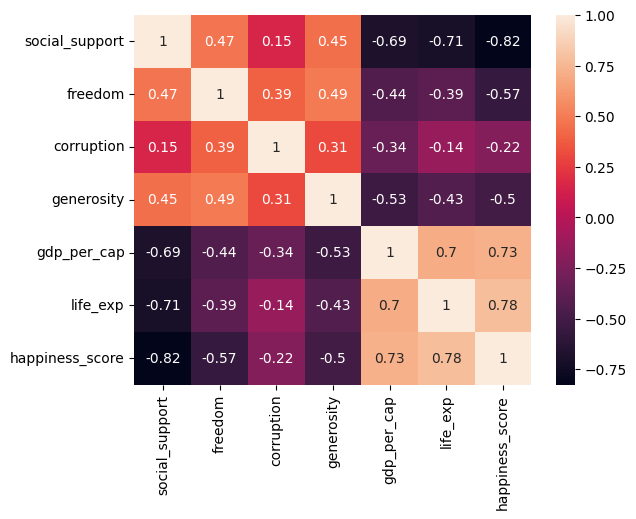

In [ ]:
corr_dataset = world_happiness.drop(columns=['country'])
correlation_matrix = corr_dataset.corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)

array([[<Axes: title={'center': 'life_exp'}>]], dtype=object)

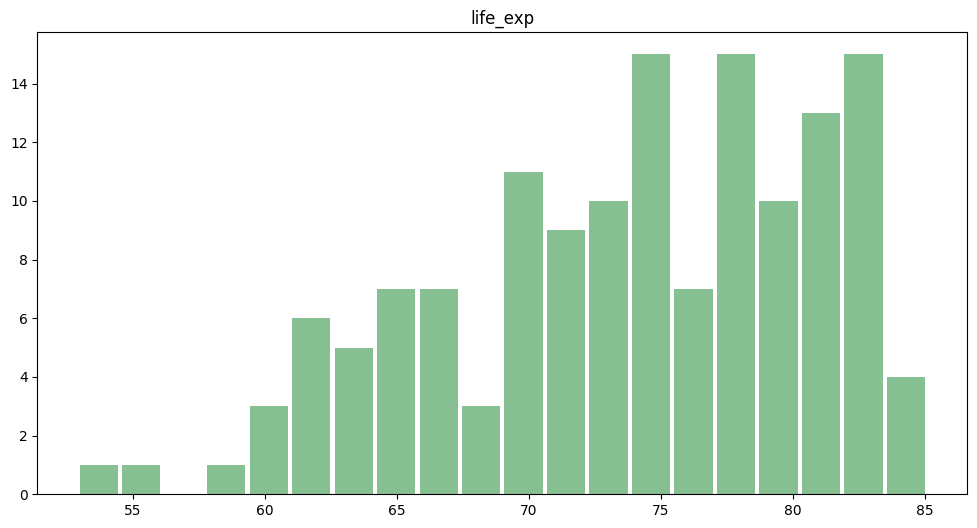

In [9]:
world_happiness.hist(column='life_exp', bins=20, grid=False, figsize=(12,6), color='#86bf91', zorder=2, rwidth=0.9)

In [10]:
number_of_countries_with_social_support_larger_than_50 = world_happiness[world_happiness['social_support'] > 50]

In [11]:
probability = number_of_countries_with_social_support_larger_than_50.shape[0] / world_happiness.shape[0]
print(f"Probability of a country having a social support score larger than 50: {probability}")

Probability of a country having a social support score larger than 50: 0.6643356643356644


In [12]:
from scipy.stats import norm

mean_life_exp = world_happiness['life_exp'].mean()
std_life_exp = world_happiness['life_exp'].std()
#cdf - cumulative distribution function, hence probability of life expectancy being less than 80
# to find the probability of life expectancy being greater than 80, we subtract the cdf from 1
probability_life_exp_greater_than_80 = 1 - norm.cdf(80, mean_life_exp, std_life_exp)
print(f"Probability of a country having a life expectancy greater than 80: {probability_life_exp_greater_than_80}")

Probability of a country having a life expectancy greater than 80: 0.1908703229127775


In [30]:
from sklearn.linear_model import LinearRegression
X = world_happiness[['gdp_per_cap']]
y = world_happiness['happiness_score']

reg = LinearRegression()
reg.fit(X, y)

predicted_happiness = reg.predict(X)
world_happiness['predicted_happiness'] = predicted_happiness

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score,predicted_happiness
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155,114.203491
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154,123.886898
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153,153.429494
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152,123.230395
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151,127.497659
...,...,...,...,...,...,...,...,...,...
139,Rwanda,144.0,21.0,2.0,90.0,2110,69.1,4,48.077312
140,Tanzania,131.0,78.0,34.0,49.0,2980,67.7,3,49.505204
141,Afghanistan,151.0,155.0,136.0,137.0,1760,64.1,2,47.502872
142,Central African Republic,155.0,133.0,122.0,113.0,794,52.9,1,45.917420
